In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go


### 5 pre-requisite rule
1) Every data should be numeric in nature, not in categorical type.
2) Data Type is correct or not - make sure you have DateTime column and Target variable (VWAP)
3) There should not be any missing data, if yes, first impute and then try to solve TSF
4) Data should be sequential order (DATETIME Columns) - TimeSeries always in an ascending order
5) We have to check whether in the given dataset - do we have Trend, Seasonality, Cyclicity and Irregular (Noise/Error)


In [181]:
import yfinance as yf

stk = yf.Ticker("IRFC.NS")

In [182]:
stk_info = pd.DataFrame.from_dict(stk.info, orient='index',columns=['Info'])

In [183]:
avg_vol = stk_info[stk_info.index == 'averageVolume']

In [184]:
stk_hist = stk.history(period = '10y')

In [185]:
stk_hist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-29 00:00:00+05:30,21.366637,22.138924,20.894684,21.280827,381938573,0.0,0.0
2021-02-01 00:00:00+05:30,21.666974,21.795688,21.366639,21.538260,72044464,0.0,0.0
2021-02-02 00:00:00+05:30,21.838592,21.838592,21.195018,21.237923,36735442,0.0,0.0
2021-02-03 00:00:00+05:30,21.280829,21.366639,20.637256,20.808876,45816269,0.0,0.0
2021-02-04 00:00:00+05:30,20.808875,22.138926,20.465636,21.752783,88486029,0.0,0.0
2021-02-05 00:00:00+05:30,21.967306,22.482165,21.924400,22.053116,56318695,0.0,0.0
2021-02-08 00:00:00+05:30,22.224736,22.267642,21.967307,22.096022,28324374,0.0,0.0
2021-02-09 00:00:00+05:30,22.096022,22.138926,21.624069,21.709877,25243532,0.0,0.0
2021-02-10 00:00:00+05:30,21.795685,22.138924,21.452446,21.795685,33132159,0.0,0.0


In [186]:
stk_hist.reset_index(inplace=True)
stk_hist['Date'] = pd.to_datetime(stk_hist['Date']).dt.date

In [187]:
stk_hist.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [188]:
stk_hist.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-29,21.366637,22.138924,20.894684,21.280827,381938573,0.0,0.0
1,2021-02-01,21.666974,21.795688,21.366639,21.538260,72044464,0.0,0.0
2,2021-02-02,21.838592,21.838592,21.195018,21.237923,36735442,0.0,0.0
3,2021-02-03,21.280829,21.366639,20.637256,20.808876,45816269,0.0,0.0
4,2021-02-04,20.808875,22.138926,20.465636,21.752783,88486029,0.0,0.0
5,2021-02-05,21.967306,22.482165,21.924400,22.053116,56318695,0.0,0.0
6,2021-02-08,22.224736,22.267642,21.967307,22.096022,28324374,0.0,0.0
7,2021-02-09,22.096022,22.138926,21.624069,21.709877,25243532,0.0,0.0
8,2021-02-10,21.795685,22.138924,21.452446,21.795685,33132159,0.0,0.0
9,2021-02-11,21.795685,22.010209,21.666970,21.795685,13586295,0.0,0.0


In [256]:
stk_hist.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
913,2024-10-11,151.199997,155.240005,150.399994,152.399994,16029678,0.0,0.0
914,2024-10-14,153.500000,154.149994,151.009995,151.350006,9810920,0.0,0.0
915,2024-10-15,151.869995,152.149994,150.110001,151.100006,8339050,0.0,0.0
916,2024-10-16,151.000000,152.750000,150.500000,150.759995,12674832,0.0,0.0
917,2024-10-17,151.460007,154.500000,148.509995,149.119995,20798933,0.0,0.0
918,2024-10-18,148.000000,148.399994,145.320007,147.679993,11316090,0.0,0.0
919,2024-10-21,148.000000,149.000000,144.000000,144.690002,10148561,0.0,0.0
920,2024-10-22,144.199997,144.690002,136.509995,137.679993,21418863,0.0,0.0
921,2024-10-23,137.990005,141.369995,133.399994,139.419998,26287104,0.0,0.0
922,2024-10-24,139.000000,140.850006,137.460007,139.029999,12491145,0.0,0.0


In [189]:
stk_hist.duplicated().sum()

0

In [190]:
stk_hist.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [191]:
import statsmodels.api as sm

# check for autocorrelation

print(sm.stats.durbin_watson(stk_hist['Open']))
print(sm.stats.durbin_watson(stk_hist['Close']))
print(sm.stats.durbin_watson(stk_hist['Volume']))
print(sm.stats.durbin_watson(stk_hist['High']))
print(sm.stats.durbin_watson(stk_hist['Low']))

0.0017145976517405888
0.0011488090306602044
0.35593198056548453
0.001147996935161625
0.0017087412530988918


In [192]:
stk_hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,923.000000,923.000000,923.000000,923.000000,9.230000e+02,923.000000,923.0
mean,58.788648,59.874376,57.507851,58.563102,4.484791e+07,0.005905,0.0
std,57.517866,58.702887,55.894588,57.120949,7.062325e+07,0.068451,0.0
min,18.021460,18.159733,17.791007,17.975370,0.000000e+00,0.000000,0.0
25%,20.793766,20.971266,20.570178,20.740812,7.968343e+06,0.000000,0.0
50%,26.768437,27.110369,26.279962,26.719589,1.840856e+07,0.000000,0.0
75%,76.203373,77.324011,75.198171,75.891453,4.506274e+07,0.000000,0.0
max,219.545398,228.112058,213.698164,216.586914,5.738700e+08,1.050000,0.0


In [193]:
df = stk_hist.drop(['Dividends','Stock Splits'],axis=1)

In [194]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2021-01-29,21.366637,22.138924,20.894684,21.280827,381938573
1,2021-02-01,21.666974,21.795688,21.366639,21.538260,72044464
2,2021-02-02,21.838592,21.838592,21.195018,21.237923,36735442
3,2021-02-03,21.280829,21.366639,20.637256,20.808876,45816269
4,2021-02-04,20.808875,22.138926,20.465636,21.752783,88486029


In [195]:
df.set_index('Date', inplace=True)

In [196]:
start_date = df.index.min()
end_date = df.index.max()
print("Start Date of Stocks :", start_date)
print("End Date of Stocks :", end_date)

Start Date of Stocks : 2021-01-29
End Date of Stocks : 2024-10-24


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 2021-01-29 to 2024-10-24
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    923 non-null    float64
 1   High    923 non-null    float64
 2   Low     923 non-null    float64
 3   Close   923 non-null    float64
 4   Volume  923 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 43.3+ KB


<Axes: xlabel='Date'>

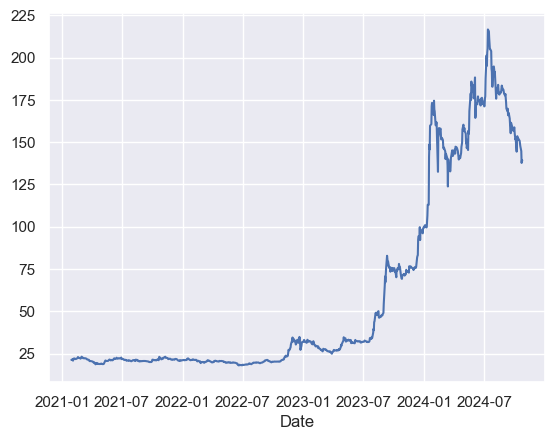

In [198]:
df['Close'].plot()

In [199]:
df.reset_index(inplace=True)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    923 non-null    object 
 1   Open    923 non-null    float64
 2   High    923 non-null    float64
 3   Low     923 non-null    float64
 4   Close   923 non-null    float64
 5   Volume  923 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 43.4+ KB


In [201]:
df['Date'] = pd.to_datetime(df['Date'])

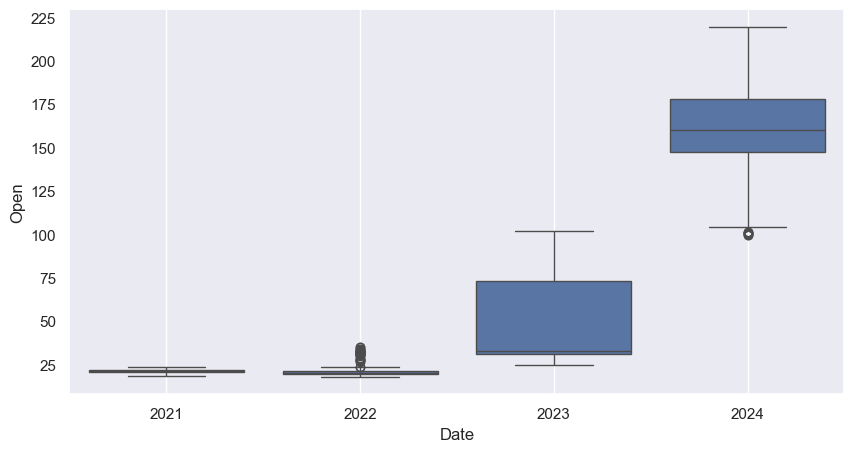

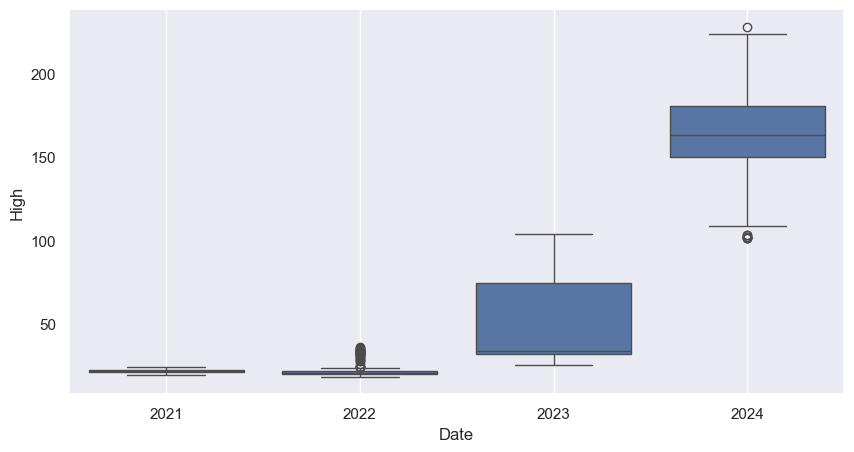

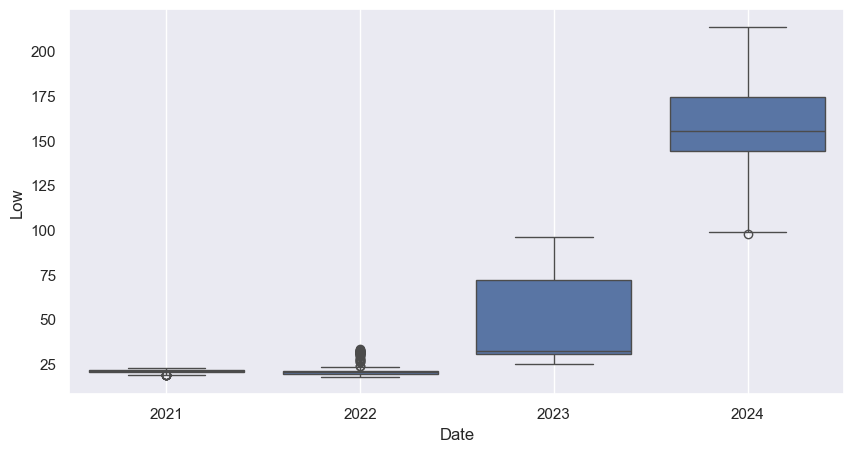

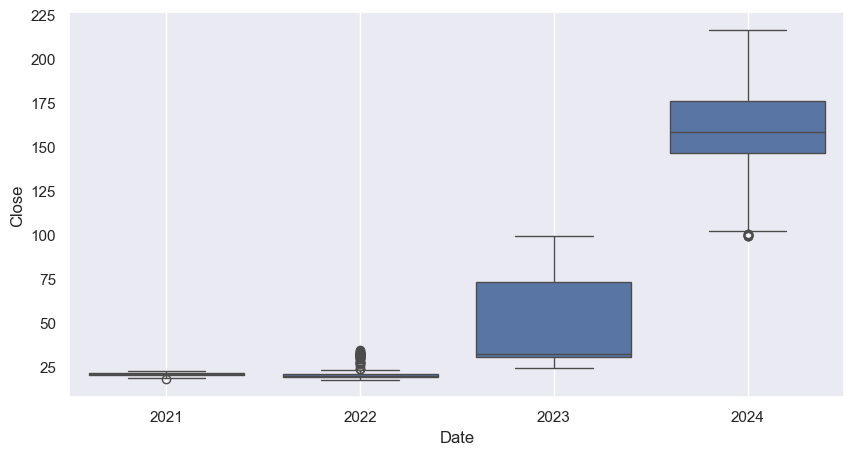

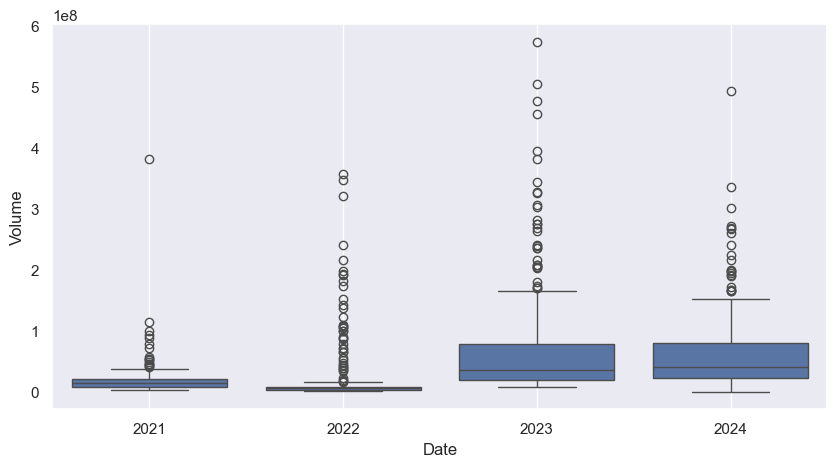

In [202]:
for i in df.columns[1:] :
    plt.figure(figsize=(10,5))
    sns.boxplot(x= df['Date'].dt.year, y=df[i] )
    plt.grid()
    plt.show()

In [203]:
df_final_model = df[['Date', 'Open', 'High', 'Low','Close', 'Volume']]
df_final_model

,Date,Open,High,Low,Close,Volume
0,2021-01-29,21.366637,22.138924,20.894684,21.280827,381938573
1,2021-02-01,21.666974,21.795688,21.366639,21.538260,72044464
2,2021-02-02,21.838592,21.838592,21.195018,21.237923,36735442
3,2021-02-03,21.280829,21.366639,20.637256,20.808876,45816269
4,2021-02-04,20.808875,22.138926,20.465636,21.752783,88486029
...,...,...,...,...,...,...
918,2024-10-18,148.000000,148.399994,145.320007,147.679993,11316090
919,2024-10-21,148.000000,149.000000,144.000000,144.690002,10148561
920,2024-10-22,144.199997,144.690002,136.509995,137.679993,21418863
921,2024-10-23,137.990005,141.369995,133.399994,139.419998,26287104


In [204]:
df_final_model.set_index('Date',inplace=True)

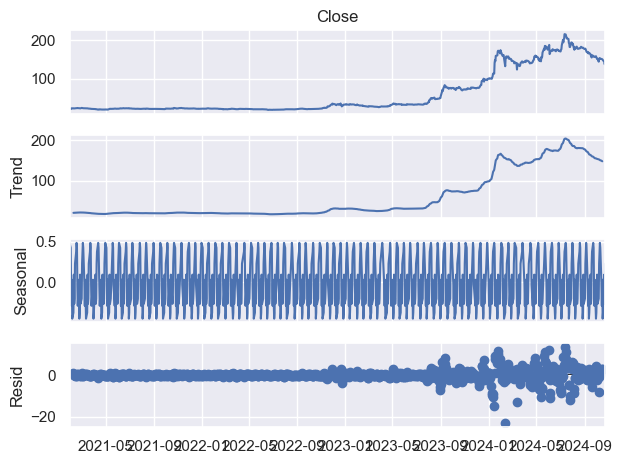

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompse = seasonal_decompose(df_final_model['Close'], model='additive', period=12)
decompse.plot()
plt.show()

In [206]:
df_final_model['Date'] = df_final_model.index

In [207]:
trend = decompse.trend
seasonality = decompse.seasonal
residual = decompse.resid

print('Trend', '\n', trend.head(12),'\n')
print('Seasoanlity', '\n', seasonality.head(12),'\n')
print('Residual', '\n', residual.head(12),'\n')

Trend 
 Date
2021-01-29          NaN
2021-02-01          NaN
2021-02-02          NaN
2021-02-03          NaN
2021-02-04          NaN
2021-02-05          NaN
2021-02-08    21.702726
2021-02-09    21.787428
2021-02-10    21.903729
2021-02-11    22.052285
2021-02-12    22.155166
2021-02-15    22.191298
Name: trend, dtype: float64 

Seasoanlity 
 Date
2021-01-29    0.484804
2021-02-01    0.423716
2021-02-02   -0.031352
2021-02-03   -0.293884
2021-02-04    0.028635
2021-02-05   -0.452900
2021-02-08   -0.378865
2021-02-09    0.091651
2021-02-10   -0.269675
2021-02-11   -0.204894
2021-02-12    0.227429
2021-02-15    0.375337
Name: seasonal, dtype: float64 

Residual 
 Date
2021-01-29         NaN
2021-02-01         NaN
2021-02-02         NaN
2021-02-03         NaN
2021-02-04         NaN
2021-02-05         NaN
2021-02-08    0.772161
2021-02-09   -0.169202
2021-02-10    0.161631
2021-02-11   -0.051706
2021-02-12   -0.586910
2021-02-15   -0.470613
Name: resid, dtype: float64 



In [208]:
df_final_model.index.min() , df_final_model.index.max()

(Timestamp('2021-01-29 00:00:00'), Timestamp('2024-10-24 00:00:00'))

In [209]:
df_final_model['Month'] = df_final_model.index.month
df_final_model['Year'] = df_final_model.index.year

df_final_model.head()

,Open,High,Low,Close,Volume,Date,Month,Year
Date,,,,,,,,
2021-01-29,21.366637,22.138924,20.894684,21.280827,381938573,2021-01-29,1,2021
2021-02-01,21.666974,21.795688,21.366639,21.538260,72044464,2021-02-01,2,2021
2021-02-02,21.838592,21.838592,21.195018,21.237923,36735442,2021-02-02,2,2021
2021-02-03,21.280829,21.366639,20.637256,20.808876,45816269,2021-02-03,2,2021
2021-02-04,20.808875,22.138926,20.465636,21.752783,88486029,2021-02-04,2,2021


In [210]:
train_df = df_final_model[pd.to_datetime(df_final_model['Date']) < pd.to_datetime('2024-05-23')]

# training data means : 2000-01-03 to 2015-03-22
# test data means : 2015-03-23 to 2021-04-30
test_df = df_final_model[pd.to_datetime(df_final_model['Date']) >= pd.to_datetime('2024-05-23')]

In [211]:
train_df.shape , test_df.shape

((816, 8), (107, 8))

In [212]:
# To check Time Series is Stationary or not - this is mandatory steps
# please ensure your data should be stationary
# How will check it - Augmented dickey fuller test 
from statsmodels.tsa.stattools import adfuller

In [214]:
adfuller(train_final['Close'])

(1.2709220071408935,
 0.9964410585591247,
 21,
 794,
 {'1%': -3.4386126789104074,
  '5%': -2.865186972298872,
  '10%': -2.5687119871327146},
 3507.8747885493744)

In [215]:
def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test")
    labels = ['ADF Test', 'P-Value', '#Lags','No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + "----->"+ str(i))
        
    if result[1] <= 0.05:
        print("Strong evidence against Null Hypothesis and my time series is Staionary")
    else:
        print("Weak Evidence against Null Hypothesis and my time series is Non-Stationary")

In [216]:
check_adftest(train_final['Close'])

Augmented Dickey Fuller Test
ADF Test----->1.2709220071408935
P-Value----->0.9964410585591247
#Lags----->21
No. of Observation----->794
Weak Evidence against Null Hypothesis and my time series is Non-Stationary


In [217]:
import itertools
def pdq_creator(start,stop,order):

    p = q = range(start,stop)
    d = range(0,order)
    pdq = list(itertools.product(p, d, q)) # Trend

    seasonal_pdq = [(x[0], x[1], x[2], 5) for x in list(itertools.product(p, d, q))] # Seasonality

    return pdq , seasonal_pdq


In [218]:
# Since my time series is stationary so we are ready to build Time Series Forecasting

pdq , seonsonal_pdq = pdq_creator(0,5,order=3)

print(pdq)

print(seonsonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 0, 3), (0, 0, 4), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 2, 0), (0, 2, 1), (0, 2, 2), (0, 2, 3), (0, 2, 4), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 2, 0), (1, 2, 1), (1, 2, 2), (1, 2, 3), (1, 2, 4), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 2, 0), (2, 2, 1), (2, 2, 2), (2, 2, 3), (2, 2, 4), (3, 0, 0), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 2, 0), (3, 2, 1), (3, 2, 2), (3, 2, 3), (3, 2, 4), (4, 0, 0), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 1, 0), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 2, 0), (4, 2, 1), (4, 2, 2), (4, 2, 3), (4, 2, 4)]
[(0, 0, 0, 5), (0, 0, 1, 5), (0, 0, 2, 5), (0, 0, 3, 5), (0, 0, 4, 5), (0, 1, 0, 5), (0, 1, 1, 5), (0, 1, 2, 5), (0, 1, 3, 5), (0, 1, 4, 5), (0, 2, 0, 5), (0, 2, 1, 5), (0, 2

In [238]:
x_train = train_df[['Open', 'High', 'Low', 'Volume']]
x_test = test_df[['Open', 'High', 'Low', 'Volume']]

y_train = train_df[['Close']]
y_test = test_df[['Close']]

## ARIMA

In [220]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming pdq is a list of ARIMA (p, d, q) parameters
# Example: pdq = [(1, 1, 1), (2, 1, 2), ...]

dfobject_ARIMA = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])  # Initialize an empty dataframe to store results

pdq , _ = pdq_creator(0,5,2) # no seasonality

# Iterate through ARIMA parameters (p, d, q)
for param in pdq:
    try:
        # Build the ARIMA model
        model = ARIMA(y_train['Close'], order=param)
        result_ARIMA = model.fit()

        # Print model summary (AIC)
        print(f"ARIMA{param} - AIC: {result_ARIMA.aic}")

        # Append results (AIC value) to dataframe
        dfobject_ARIMA = pd.concat([dfobject_ARIMA, pd.DataFrame([{
            "param": param,
            "AIC": result_ARIMA.aic
        }])], ignore_index=True)
        
    except Exception as e:
        print(f"ARIMA{param} failed: {e}")

ARIMA(0, 0, 0) - AIC: 8374.762659810189
ARIMA(0, 0, 1) - AIC: 7292.53079124278
ARIMA(0, 0, 2) - AIC: 6479.8553273848665
ARIMA(0, 0, 3) - AIC: 5885.387008437174
ARIMA(0, 0, 4) - AIC: 6061.529224674292
ARIMA(0, 1, 0) - AIC: 3717.5867883193523
ARIMA(0, 1, 1) - AIC: 3718.4964187249125
ARIMA(0, 1, 2) - AIC: 3716.4992892577993
ARIMA(0, 1, 3) - AIC: 3705.3901067282795
ARIMA(0, 1, 4) - AIC: 3657.667643345383
ARIMA(1, 0, 0) - AIC: 3733.233969526281
ARIMA(1, 0, 1) - AIC: 3733.7821651756267
ARIMA(1, 0, 2) - AIC: 3732.1779086627494
ARIMA(1, 0, 3) - AIC: 3721.089046060503
ARIMA(1, 0, 4) - AIC: 3673.321740250083
ARIMA(1, 1, 0) - AIC: 3718.332561792003
ARIMA(1, 1, 1) - AIC: 3714.0452705003167
ARIMA(1, 1, 2) - AIC: 3689.428127091125
ARIMA(1, 1, 3) - AIC: 3662.4670410994718
ARIMA(1, 1, 4) - AIC: 3645.3009544457727
ARIMA(2, 0, 0) - AIC: 3734.0226090351525
ARIMA(2, 0, 1) - AIC: 3735.8894243980494
ARIMA(2, 0, 2) - AIC: 3736.425209023992
ARIMA(2, 0, 3) - AIC: 3732.001050534772
ARIMA(2, 0, 4) - AIC: 3724.10

In [229]:
dfobject_ARIMA.sort_values(by=['AIC']).iloc[0]

param         (4, 1, 4)
seasonal            NaN
AIC         3612.405192
Name: 49, dtype: object

## ARIMAX

In [239]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming pdq is a list of ARIMA (p, d, q) parameters
# Example: pdq = [(1, 1, 1), (2, 1, 2), ...]

dfobject_ARIMAX = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])  # Initialize an empty dataframe to store results

pdq , _ = pdq_creator(0,5,2) # no seasonality

# Iterate through ARIMA parameters (p, d, q)
for param in pdq:
    try:
        # Build the ARIMA model
        model = ARIMA(y_train['Close'], exog=x_train, order=param)
        result_ARIMA = model.fit()

        # Print model summary (AIC)
        print(f"ARIMAX {param} - AIC: {result_ARIMA.aic}")

        # Append results (AIC value) to dataframe
        dfobject_ARIMAX = pd.concat([dfobject_ARIMAX, pd.DataFrame([{
            "param": param,
            "AIC": result_ARIMA.aic
        }])], ignore_index=True)
        
    except Exception as e:
        print(f"ARIMAX {param} failed: {e}")


ARIMAX (0, 0, 0) - AIC: 6680.958894172352
ARIMAX (0, 0, 1) - AIC: 1994.5561024645497
ARIMAX (0, 0, 2) - AIC: 1995.700515670573
ARIMAX (0, 0, 3) - AIC: 1981.1383091940897
ARIMAX (0, 0, 4) - AIC: 1975.6701485434087
ARIMAX (0, 1, 0) - AIC: 7111.776300146495
ARIMAX (0, 1, 1) - AIC: 2385.0704279158854
ARIMAX (0, 1, 2) - AIC: 2371.782827087356
ARIMAX (0, 1, 3) - AIC: 2342.9420119482124
ARIMAX (0, 1, 4) - AIC: 2313.814704748762
ARIMAX (1, 0, 0) - AIC: 1993.993128120647
ARIMAX (1, 0, 1) - AIC: 1995.4156053973563
ARIMAX (1, 0, 2) - AIC: 1995.082915498384
ARIMAX (1, 0, 3) - AIC: 1969.5454398244278
ARIMAX (1, 0, 4) - AIC: 1972.3134008888546
ARIMAX (1, 1, 0) - AIC: 2374.924219086
ARIMAX (1, 1, 1) - AIC: 2375.8511082895557
ARIMAX (1, 1, 2) - AIC: 2373.800481287306
ARIMAX (1, 1, 3) - AIC: 2327.11732424585
ARIMAX (1, 1, 4) - AIC: 2316.0388931489592
ARIMAX (2, 0, 0) - AIC: 1994.7245527994437
ARIMAX (2, 0, 1) - AIC: 2032.1222367483515
ARIMAX (2, 0, 2) - AIC: 1985.5604538259938
ARIMAX (2, 0, 3) - AIC: 1

In [240]:
dfobject_ARIMAX.sort_values(by=['AIC']).iloc[0]

param        (1, 0, 3)
seasonal           NaN
AIC         1969.54544
Name: 13, dtype: object

## SARIMA

In [233]:
import statsmodels.api as sm
import pandas as pd

# Assuming pdq and model_pdq are defined with appropriate parameter ranges
# Example:
# pdq = [(p,d,q) for p in range(3) for d in range(2) for q in range(3)]
# model_pdq = [(p,d,q,s) for p in range(3) for d in range(2) for q in range(3) for s in [12]]

# Initialize DataFrame to store AIC values
dfobject_SARIMA = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

pdq , model_pdq = pdq_creator(0,3,2) # no seasonality

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            # Build the SARIMA model
            model = sm.tsa.statespace.SARIMAX(y_train['Close'], 
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            
            # Fit the model
            result_SARIMA = model.fit()

            # Print the AIC value for model evaluation
            print(f"SARIMA {param},{param_seasonal} - AIC: {result_SARIMA.aic}")

            # Store the parameters and AIC values in a DataFrame
            dfobject_SARIMA = pd.concat([dfobject_SARIMA, pd.DataFrame([{"param": param, 
                                                           "seasonal": param_seasonal, 
                                                           "AIC": result_SARIMA.aic}])], 
                                 ignore_index=True)
        
        except Exception as e:
            print(f"Error fitting SARIMA {param} , {param_seasonal}: {e}")


SARIMA (0, 0, 0),(0, 0, 0, 5) - AIC: 8979.072664637086
SARIMA (0, 0, 0),(0, 0, 1, 5) - AIC: 7899.106966831933
SARIMA (0, 0, 0),(0, 0, 2, 5) - AIC: 7034.918489507336
SARIMA (0, 0, 0),(0, 1, 0, 5) - AIC: 5106.7704950142115
SARIMA (0, 0, 0),(0, 1, 1, 5) - AIC: 5021.79418318029
SARIMA (0, 0, 0),(0, 1, 2, 5) - AIC: 4993.434704719247
SARIMA (0, 0, 0),(1, 0, 0, 5) - AIC: 5078.09851951788
SARIMA (0, 0, 0),(1, 0, 1, 5) - AIC: 5030.050057766117
SARIMA (0, 0, 0),(1, 0, 2, 5) - AIC: 4993.162599896553
SARIMA (0, 0, 0),(1, 1, 0, 5) - AIC: 5044.227233595482
SARIMA (0, 0, 0),(1, 1, 1, 5) - AIC: 5022.111431027489
SARIMA (0, 0, 0),(1, 1, 2, 5) - AIC: 4994.634906297915
SARIMA (0, 0, 0),(2, 0, 0, 5) - AIC: 5025.785594340849
SARIMA (0, 0, 0),(2, 0, 1, 5) - AIC: 5006.110256386019
SARIMA (0, 0, 0),(2, 0, 2, 5) - AIC: 4983.846762840829
SARIMA (0, 0, 0),(2, 1, 0, 5) - AIC: 4993.755054033899
SARIMA (0, 0, 0),(2, 1, 1, 5) - AIC: 4994.204509595766
SARIMA (0, 0, 0),(2, 1, 2, 5) - AIC: 4970.346841659186
SARIMA (0, 

In [234]:
dfobject_SARIMA.sort_values(by=['AIC']).iloc[0]

param          (2, 1, 2)
seasonal    (0, 1, 2, 5)
AIC          3575.280652
Name: 311, dtype: object

## SARIMAX

In [242]:
# Lets build the model

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

dfobject_SARIMAX = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

pdq , model_pdq = pdq_creator(0,3,2) # no seasonality

for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(y_train['Close'], 
                                          exog=x_train,
                                          order= param,
                                          seasonal_order= param_seasonal,
                                          enforce_stationarity= False,
                                          enforce_invertibility=False)
        
        result_SARIMAX = model.fit()

        print("SARIMAX {},{} - AIC:{}".format(param, param_seasonal, result_SARIMAX.aic))

        dfobject_SARIMAX = pd.concat([dfobject_SARIMAX, pd.DataFrame([{"param":param, "seasonal":param_seasonal, 
                                   "AIC" : result_SARIMAX.aic}])], ignore_index=True)

SARIMAX (0, 0, 0),(0, 0, 0, 5) - AIC:6674.2659256540965
SARIMAX (0, 0, 0),(0, 0, 1, 5) - AIC:2019.870908349136
SARIMAX (0, 0, 0),(0, 0, 2, 5) - AIC:2013.629805447364
SARIMAX (0, 0, 0),(0, 1, 0, 5) - AIC:7135.943095032941
SARIMAX (0, 0, 0),(0, 1, 1, 5) - AIC:2265.7098187969905
SARIMAX (0, 0, 0),(0, 1, 2, 5) - AIC:2252.963200338816
SARIMAX (0, 0, 0),(1, 0, 0, 5) - AIC:2020.9512192604318
SARIMAX (0, 0, 0),(1, 0, 1, 5) - AIC:2022.5325917476182
SARIMAX (0, 0, 0),(1, 0, 2, 5) - AIC:2014.198494004264
SARIMAX (0, 0, 0),(1, 1, 0, 5) - AIC:2328.1611914471678
SARIMAX (0, 0, 0),(1, 1, 1, 5) - AIC:2286.1387373561156
SARIMAX (0, 0, 0),(1, 1, 2, 5) - AIC:2255.050506342529
SARIMAX (0, 0, 0),(2, 0, 0, 5) - AIC:2013.9729336897922
SARIMAX (0, 0, 0),(2, 0, 1, 5) - AIC:2015.8298923460936
SARIMAX (0, 0, 0),(2, 0, 2, 5) - AIC:2014.9559443072103
SARIMAX (0, 0, 0),(2, 1, 0, 5) - AIC:2297.3187255750972
SARIMAX (0, 0, 0),(2, 1, 1, 5) - AIC:2285.058270952927
SARIMAX (0, 0, 0),(2, 1, 2, 5) - AIC:2251.687449367663


In [243]:
dfobject_SARIMAX.sort_values(by=['AIC']).iloc[0]

param          (2, 0, 2)
seasonal    (0, 0, 2, 5)
AIC          1970.128136
Name: 254, dtype: object

## Final Model

In [244]:
#param  : (2, 0, 2) (0, 0, 2, 5) , AIC   :  1970.128136

model = sm.tsa.statespace.SARIMAX(y_train['Close'], exog=x_train,
                                order= (2, 0, 2), seasonal_order =  (0, 0, 2, 5),
                        enforce_stationarity= False,enforce_invertibility=False)
result = model.fit()
print(result.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  816
Model:             SARIMAX(2, 0, 2)x(0, 0, 2, 5)   Log Likelihood                -974.064
Date:                           Thu, 24 Oct 2024   AIC                           1970.128
Time:                                   23:16:46   BIC                           2021.700
Sample:                                        0   HQIC                          1989.936
                                           - 816                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.7724      0.001   -896.165      0.000      -0.774      -0.771
High           1.0138      0.001   1026.850

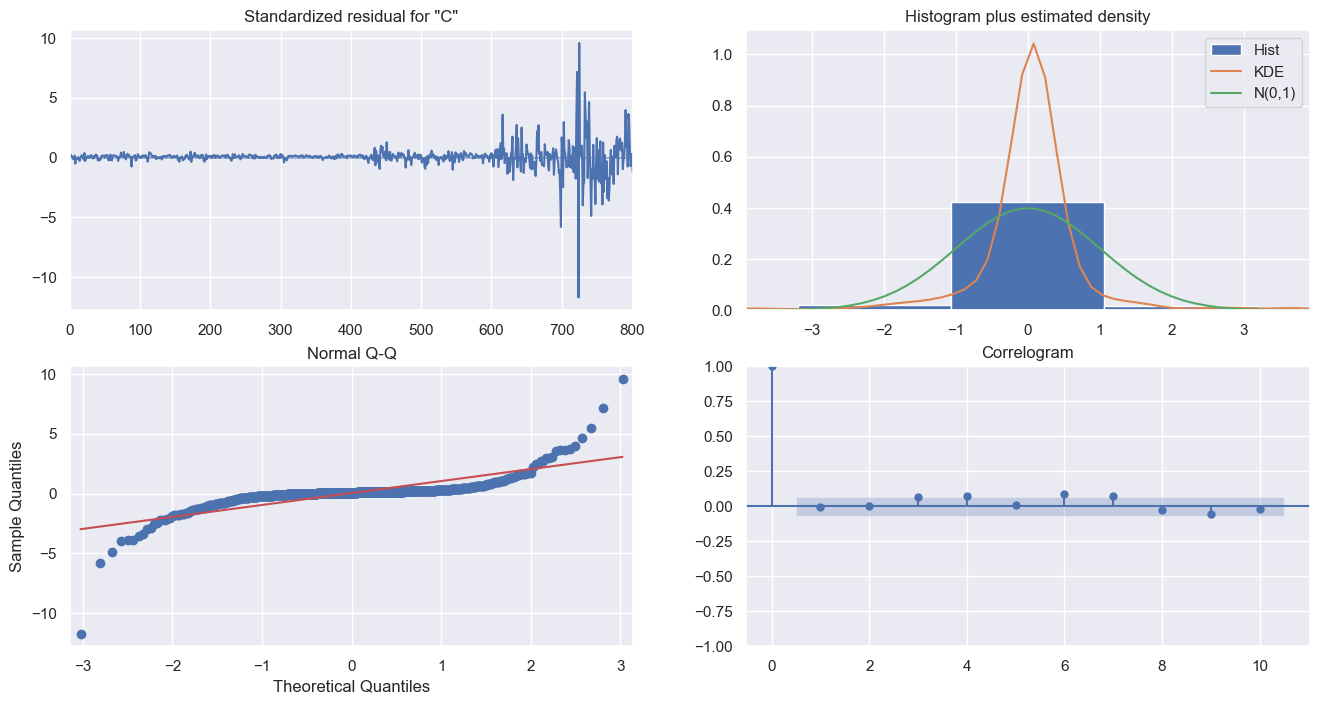

In [245]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

In [247]:
pred_SARIMAX = result.get_forecast(steps=len(test_df), exog=x_test)
pred_SARIMAX.predicted_mean

816    189.229045
817    184.268387
818    188.880814
819    179.612186
820    177.631693
          ...    
918    145.576928
919    145.193180
920    138.095994
921    137.174959
922    138.951456
Name: predicted_mean, Length: 107, dtype: float64

In [257]:
from sklearn.metrics import mean_absolute_percentage_error

# Assuming y_true contains actual values and y_pred contains predicted values
mape = mean_absolute_percentage_error(y_test, pred_SARIMAX.predicted_mean)
print(f"MAPE: {mape * 100:.2f}%")  # Multiply by 100 to express as percentage


MAPE: 0.91%


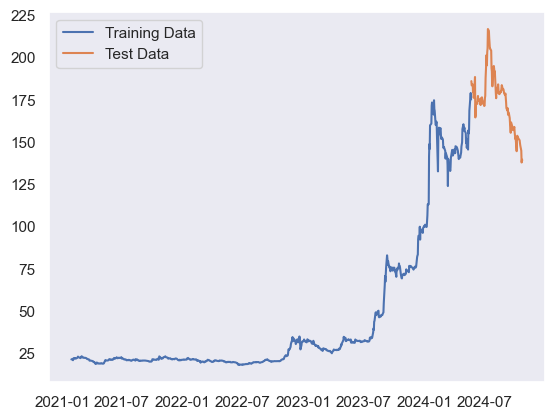

In [250]:
plt.plot(y_train, label="Training Data")
plt.plot(y_test, label="Test Data")
plt.legend(loc='best')
plt.grid();

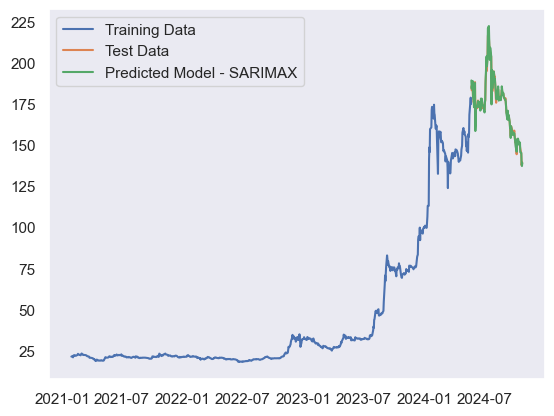

In [251]:
plt.plot(y_train, label="Training Data")
plt.plot(y_test, label="Test Data")
plt.plot(x_test.index, pred_SARIMAX.predicted_mean, label='Predicted Model - SARIMAX')
plt.legend(loc='best')
plt.grid();

In [253]:
# To get confidence intervals
confidence_intervals = pred_SARIMAX.conf_int(alpha=0.05)
print(confidence_intervals)

     lower Close  upper Close
816   187.636013   190.822078
817   182.637516   185.899258
818   187.249686   190.511942
819   177.978292   181.246080
820   175.997264   179.266122
..           ...          ...
918   143.937900   147.215957
919   143.554152   146.832209
920   136.456965   139.735022
921   135.535931   138.813988
922   137.312428   140.590485

[107 rows x 2 columns]
